In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import cmath
import cv2 as cv

# Загрузка сигналов

In [2]:
with open("spiro06.txt") as file:
    spiro = [row.strip() for row in file]

In [3]:
m = []
for i in range(len(spiro)):
    m = m + spiro[i].split("\n")
spiro = [int(x) for x in m]

In [4]:
with open("velo06.txt") as file:
    velo = [row.strip() for row in file]

In [5]:
m = []
for i in range(len(velo)):
    m = m + velo[i].split("\n")
velo = [int(x) for x in m]

# Доведение до степени 2

In [6]:
spiro2 = spiro[:512]

In [7]:
velo2 = velo[:2048]

In [8]:
velo_mormal = []
for i in range(len(velo2)):
    velo_mormal = [int(x)/1024 for x in velo2]

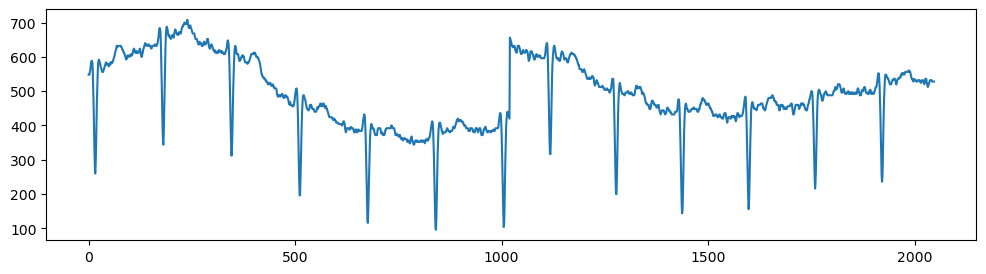

In [9]:
Y = [0]*len(velo_mormal)
X = list(range(0, len(velo_mormal)))
for i in range(len(velo_mormal)):
    Y[i] = velo_mormal[i]*1024
plt.figure(figsize=(12, 3))
plt.plot(X, Y)
plt.show()

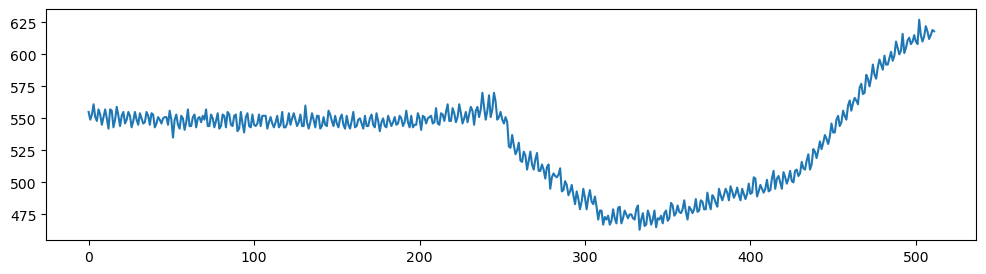

In [10]:
X = list(range(0, len(spiro2)))
for i in range(len(spiro2)):
    Y = [int(x) for x in spiro2]
plt.figure(figsize=(12, 3))
plt.plot(X, Y)
plt.show()

# Загрузка изображения

In [11]:
img = cv.imread('V2.png')
original_shape = img.shape

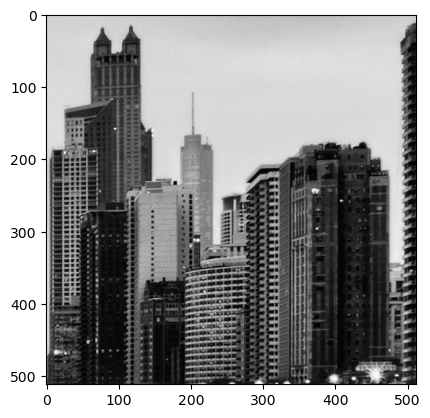

(512, 512, 3)

In [12]:
plt.imshow(img)
plt.show()
img.shape

In [13]:
all_pixels  = img.reshape((-1,3))
all_pixels.shape

(262144, 3)

In [14]:
all_normal_pixels = [[]*3]*len(all_pixels)
for i in range(len(all_pixels)):
    all_normal_pixels[i] = all_pixels[i]/255

In [15]:
normal_img = [[]*3]*len(all_normal_pixels)
for i in range(len(all_normal_pixels)):
    normal_img[i] = all_normal_pixels[i]*255

In [16]:
main_img = np.zeros((img.shape[0]*img.shape[1],3),dtype='uint8')
main_img.shape

(262144, 3)

In [17]:
for i in range(all_pixels.shape[0]):
    main_img[i] = normal_img[i]

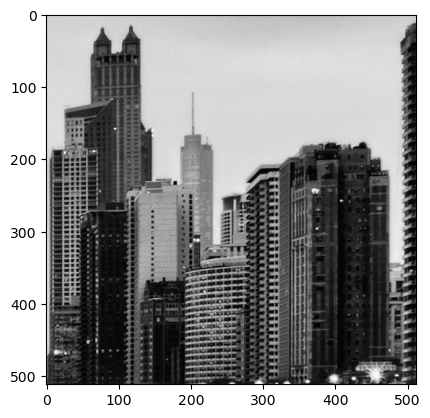

(512, 512, 3)

In [18]:
main_img = main_img.reshape(original_shape)
plt.imshow(main_img)
plt.show()
img.shape

# Хаар

In [19]:
X = [int(x) for x in velo2]
f = []
for i in range(0,len(velo2),2):
    a_i = (X[i] + X[i + 1])/2
    b_i = (X[i] - X[i + 1])/2
    f.append(a_i)
    f.append(b_i) 

In [20]:
Haar_img = []*3
for i in range(0,len(all_pixels),2):
    a_i = (all_normal_pixels[i] + all_normal_pixels[i + 1])/2
    b_i = (all_normal_pixels[i] - all_normal_pixels[i + 1])/2
    Haar_img.append(a_i)
    Haar_img.append(b_i)

In [21]:
rest_y = []
for i in range(0,len(velo2),2):
    a_i = f[i] + f[i + 1]
    b_i = f[i] - f[i + 1]
    rest_y.append(a_i)
    rest_y.append(b_i)

In [22]:
rest_img = []
for i in range(0,len(all_pixels),2):
    a_i = Haar_img[i] + Haar_img[i + 1]
    b_i = Haar_img[i] - Haar_img[i + 1]
    rest_img.append(a_i)
    rest_img.append(b_i)

In [23]:
Haar_trans_img = np.zeros((img.shape[0]*img.shape[1],3),dtype='uint8')
Haar_trans_img.shape

(262144, 3)

In [24]:
Haar_rest_img = np.zeros((img.shape[0]*img.shape[1],3),dtype='uint8')
Haar_rest_img.shape

(262144, 3)

In [25]:
for i in range(all_pixels.shape[0]):
    Haar_trans_img[i] = Haar_img[i]*255

In [26]:
for i in range(all_pixels.shape[0]):
    Haar_rest_img[i] = rest_img[i]*255

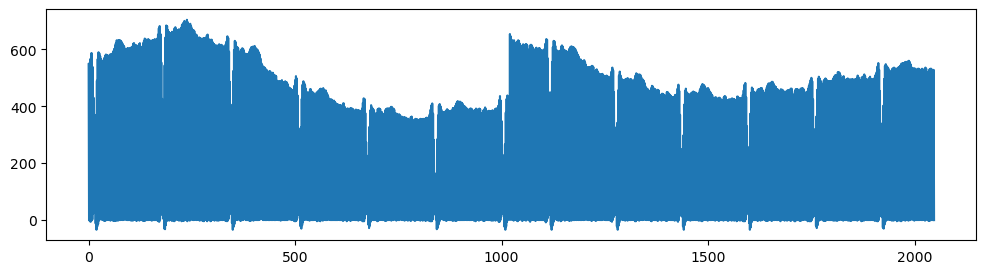

In [27]:
X = list(range(0, len(f)))
for i in range(len(f)):
    Y = [int(x) for x in f] 
plt.figure(figsize=(12, 3))
plt.plot(X, Y)
plt.show()

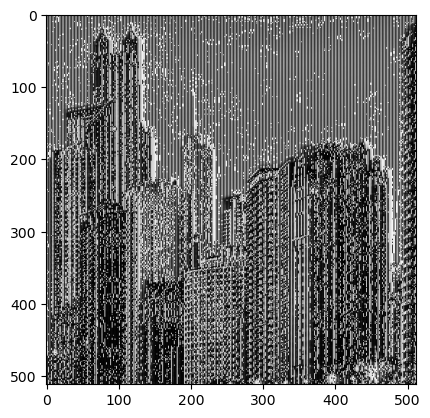

(512, 512, 3)

In [28]:
Haar_trans_img = Haar_trans_img.reshape(original_shape)
plt.imshow(Haar_trans_img)
plt.show()
img.shape

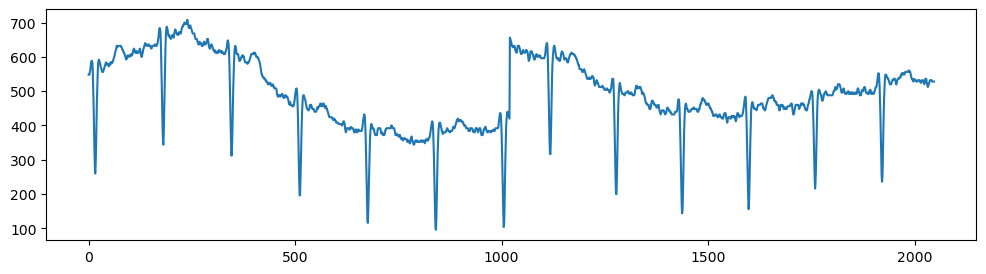

In [29]:
X = list(range(0, len(rest_y)))
for i in range(len(rest_y)):
    Y = [int(x) for x in rest_y] 
plt.figure(figsize=(12, 3))
plt.plot(X, Y)
plt.show()

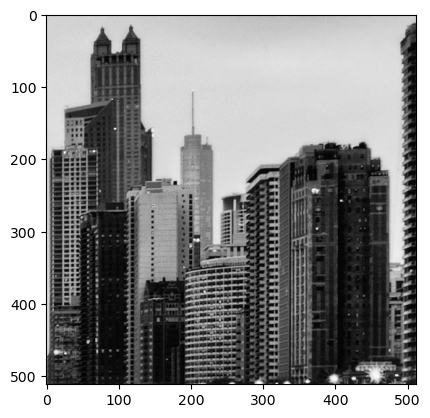

(512, 512, 3)

In [30]:
Haar_rest_img = Haar_rest_img.reshape(original_shape)
plt.imshow(Haar_rest_img)
plt.show()
img.shape

# Добеши 4

In [31]:
c0 = (1 + math.sqrt(3))/(4 * math.sqrt(2))
c1 = (3 + math.sqrt(3))/(4 * math.sqrt(2))
c2 = (3 - math.sqrt(3))/(4 * math.sqrt(2))
c3 = (1 - math.sqrt(3))/(4 * math.sqrt(2))

In [32]:
X = [int(x) for x in velo2]
f = []
for i in range(0,len(velo2),2):
    if(i < len(velo2)/2):
        a_i = c0 * X[i] + c1 * X[i + 1] + c2 * X[i + 2] + c3 * X[i + 3]
        b_i = c3 * X[i] - c2 * X[i + 1] + c1 * X[i + 2] - c0 * X[i + 3]
    else:
        a_i = c0 * X[i] + c1 * X[i + 1] + c2 * X[0] + c3 * X[1]
        b_i = c3 * X[i] - c2 * X[i + 1] + c1 * X[0] - c0 * X[1]
    f.append(a_i)
    f.append(b_i) 

In [33]:
rest_y = []
for i in range(0,len(velo2),2):
    a_i = f[i] + f[i + 1]
    b_i = f[i] - f[i + 1]
    rest_y.append(a_i)
    rest_y.append(b_i)

In [34]:
Dobeshi_img = []*3
for i in range(0,len(all_pixels),2):
    if(i < len(velo2)/2):
        a_i = c0 * all_normal_pixels[i] + c1 * all_normal_pixels[i + 1] + c2 * all_normal_pixels[i + 2] + c3 * all_normal_pixels[i + 3]
        b_i = c3 * all_normal_pixels[i] - c2 * all_normal_pixels[i + 1] + c1 * all_normal_pixels[i + 2] - c0 * all_normal_pixels[i + 3]
    else:
        a_i = c0 * all_normal_pixels[i] + c1 * all_normal_pixels[i + 1] + c2 * all_normal_pixels[0] + c3 * all_normal_pixels[1]
        b_i = c3 * all_normal_pixels[i] - c2 * all_normal_pixels[i + 1] + c1 * all_normal_pixels[0] - c0 * all_normal_pixels[1]
    Dobeshi_img.append(a_i)
    Dobeshi_img.append(b_i)

In [35]:
rest_img = []
for i in range(0,len(all_pixels),2):
    a_i = Dobeshi_img[i] + Dobeshi_img[i + 1]
    b_i = Dobeshi_img[i] - Dobeshi_img[i + 1]
    rest_img.append(a_i)
    rest_img.append(b_i)

In [36]:
Dobeshi_trans_img = np.zeros((img.shape[0]*img.shape[1],3),dtype='uint8')
Dobeshi_trans_img.shape

(262144, 3)

In [37]:
Dobeshi_rest_img = np.zeros((img.shape[0]*img.shape[1],3),dtype='uint8')
Dobeshi_rest_img.shape

(262144, 3)

In [38]:
for i in range(all_pixels.shape[0]):
    Dobeshi_trans_img[i] = Dobeshi_img[i]*255

In [39]:
for i in range(all_pixels.shape[0]):
    Dobeshi_rest_img[i] = rest_img[i]*255

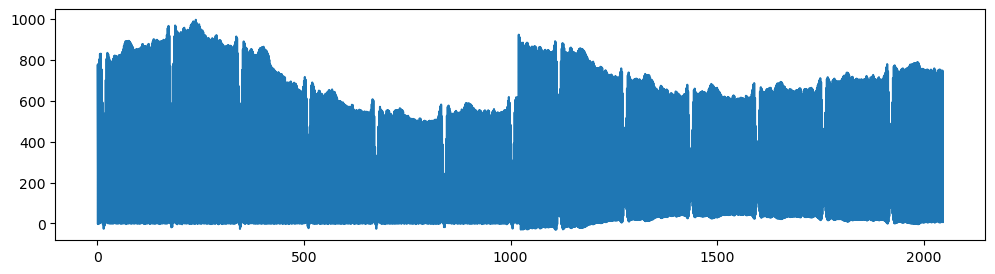

In [40]:
X = list(range(0, len(f)))
for i in range(len(f)):
    Y = [int(x) for x in f] 
plt.figure(figsize=(12, 3))
plt.plot(X, Y)
plt.show()

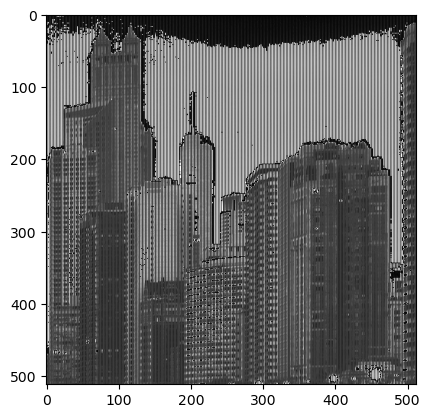

(512, 512, 3)

In [41]:
Dobeshi_trans_img = Dobeshi_trans_img.reshape(original_shape)
plt.imshow(Dobeshi_trans_img)
plt.show()
img.shape

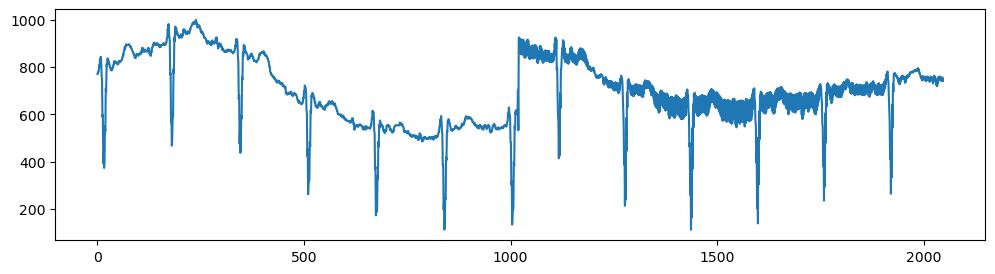

In [42]:
X = list(range(0, len(rest_y)))
for i in range(len(rest_y)):
    Y = [int(x) for x in rest_y] 
plt.figure(figsize=(12, 3))
plt.plot(X, Y)
plt.show()

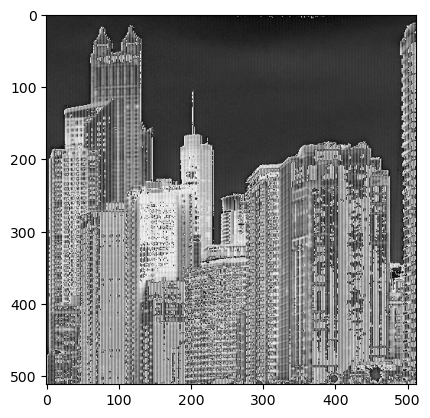

(512, 512, 3)

In [43]:
Dobeshi_rest_img = Dobeshi_rest_img.reshape(original_shape)
plt.imshow(Dobeshi_rest_img)
plt.show()
img.shape

# Преобразование изображения

In [44]:
s1 = []
s2 = []
for i in range(0,len(Dobeshi_img),1024):
    for j in range(512):
        s1.append(Dobeshi_img[i + j])
        s2.append(Dobeshi_img[512 + i + j])

In [45]:
k = []
k1 = []
k2 = []
k_res = []
for i in range(0,len(s1),512):
    for j in range(0,512,2):
        k1.append(s1[i + j])
        k2.append(s1[i + j + 1])
    k = list(k1) + list(k2)
    k1 = []
    k2 = []
    k_res += k

In [46]:
s1 = []
s1 = k_res

In [47]:
k = []
k1 = []
k2 = []
k_res = []
for i in range(0,len(s2),512):
    for j in range(0,512,2):
        k1.append(s2[i + j])
        k2.append(s2[i + j + 1])
    k = list(k1) + list(k2)
    k1 = []
    k2 = []
    k_res += k

In [48]:
s2 = []
s2 = k_res

In [49]:
res = s1 + s2

In [50]:
trans_Dobeshi2_img = np.zeros((img.shape[0]*img.shape[1],3),dtype='uint8')
trans_Dobeshi2_img.shape

(262144, 3)

In [51]:
for i in range(all_pixels.shape[0]):
    trans_Dobeshi2_img[i] = res[i]*255

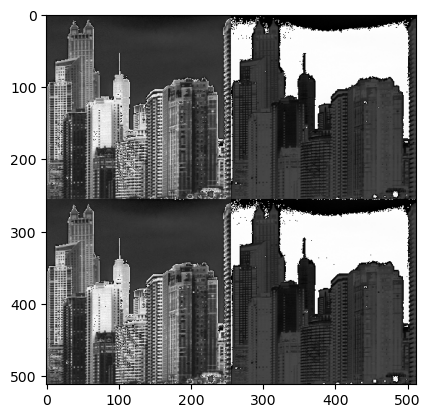

(512, 512, 3)

In [52]:
trans_Dobeshi2_img = trans_Dobeshi2_img.reshape(original_shape)
plt.imshow(trans_Dobeshi2_img)
plt.show()
img.shape

# Преобразование сигнала

In [53]:
f1 = []
f2 = []
for i in range(0,len(f) - 1,2):
    f1.append(f[i])
    f2.append(f[i + 1])

In [54]:
s_res = f1 + f2

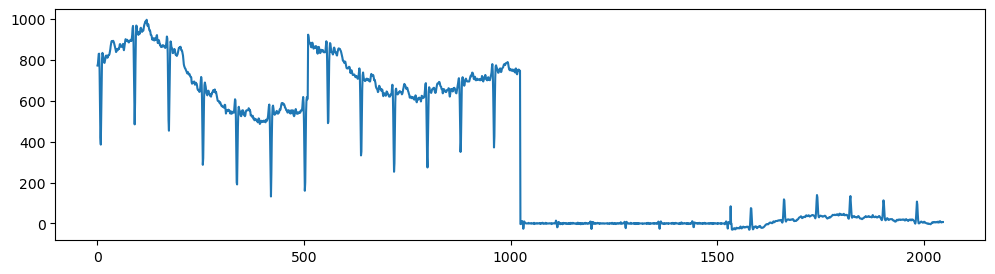

In [55]:
X = list(range(0, len(s_res)))
for i in range(len(s_res)):
    Y = [int(x) for x in s_res] 
y = Y[1024:]
plt.figure(figsize=(12, 3))
plt.plot(X, Y)
plt.show()

# 2 порядок Добеши 4

In [56]:
X = [int(x) for x in s_res]
f = []
for i in range(0,len(s_res),2):
    if(i < len(s_res)/2):
        a_i = c0 * X[i] + c1 * X[i + 1] + c2 * X[i + 2] + c3 * X[i + 3]
        b_i = c3 * X[i] - c2 * X[i + 1] + c1 * X[i + 2] - c0 * X[i + 3]
    else:
        a_i = c0 * X[i] + c1 * X[i + 1] + c2 * X[0] + c3 * X[1]
        b_i = c3 * X[i] - c2 * X[i + 1] + c1 * X[0] - c0 * X[1]
    f.append(a_i)
    f.append(b_i) 

In [57]:
s_rest = []
for i in range(len(s_res)//2):
    s_rest.append(s_res[i])
    s_rest.append(s_res[i+1024])

In [58]:
rest_y = []
for i in range(0,len(velo2),2):
    a_i = s_rest[i] + s_rest[i + 1]
    b_i = s_rest[i] - s_rest[i + 1]
    rest_y.append(a_i)
    rest_y.append(b_i)

In [59]:
Dobeshi2_img = res
for i in range(0,len(Dobeshi_img)//2,512):
    for j in range(0,256,2):
        if(j < len(velo2)/2):
            a_i = c0 * res[i + j] + c1 * res[i + j + 1] + c2 * res[i + j + 2] + c3 * res[i + j + 3]
            b_i = c3 * res[i + j] - c2 * res[i + j + 1] + c1 * res[i + j + 2] - c0 * res[i + j + 3]
        else:
            a_i = c0 * res[i + j] + c1 * res[i + j + 1] + c2 * res[0] + c3 * res[1]
            b_i = c3 * res[i + j] - c2 * res[i + j + 1] + c1 * res[0] - c0 * res[1]
        Dobeshi2_img[i + j] = a_i
        Dobeshi2_img[i + j + 1] = b_i

In [60]:
Dobeshi2_rest = []
s1 = []
s2 = []
for i in range(len(all_pixels)//2):
    s1.append(Dobeshi2_img[i])
    s2.append(Dobeshi2_img[len(res)//2 + i])

In [61]:
k_res = []
for i in range(0,len(s1),512):
    for j in range(256):
        k_res.append(s1[i + j])
        k_res.append(s1[i + j + 256])
s1 = []
s1 = k_res

In [62]:
k_res = []
for i in range(0,len(s2),512):
    for j in range(256):
        k_res.append(s2[i + j])
        k_res.append(s2[i + j + 256])
s2 = []
s2 = k_res

In [63]:
res = s1 + s2
s1 = []
s2 = []
k_res = []
for i in range(0,len(all_pixels)//2,512):
    for j in range(512):
        k_res.append(res[i + j])
    for n in range(512):
        k_res.append(res[i + j + len(all_pixels)//2])
res = k_res

In [64]:
rest_img = []
for i in range(0,len(all_pixels),2):
    a_i = res[i] + res[i + 1]
    b_i = res[i] - res[i + 1]
    rest_img.append(a_i)
    rest_img.append(b_i)

In [65]:
Dobeshi2_rest_img = np.zeros((img.shape[0]*img.shape[1],3),dtype='uint8')
Dobeshi2_rest_img.shape

(262144, 3)

In [66]:
Dobeshi2_trans_img = np.zeros((img.shape[0]*img.shape[1],3),dtype='uint8')
Dobeshi2_trans_img.shape

(262144, 3)

In [67]:
for i in range(all_pixels.shape[0]):
    Dobeshi2_rest_img[i] = rest_img[i]*255

In [68]:
for i in range(all_pixels.shape[0]):
    Dobeshi2_trans_img[i] = Dobeshi2_img[i]*255

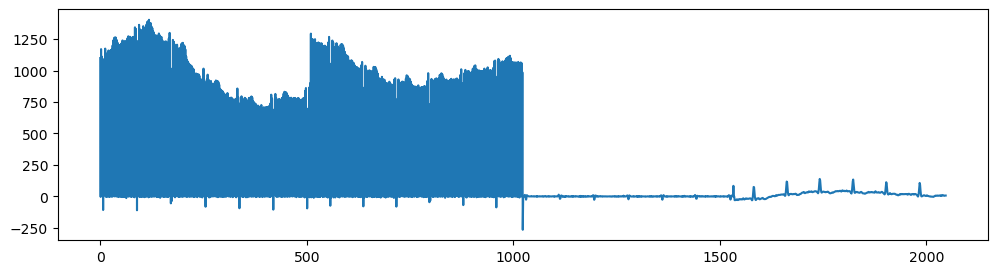

In [69]:
X = list(range(0, len(f)))
for i in range(len(f)):
    Y = [int(x) for x in f]
Y[1024:] = y
plt.figure(figsize=(12, 3))
plt.plot(X, Y)
plt.show()

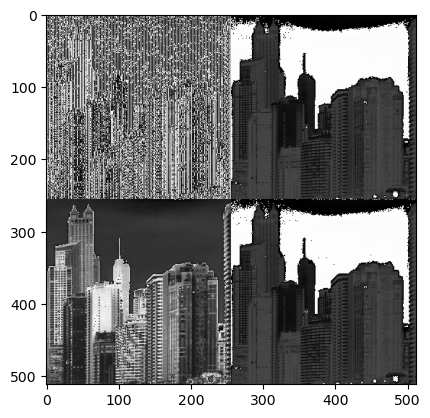

(512, 512, 3)

In [70]:
Dobeshi2_trans_img = Dobeshi2_trans_img.reshape(original_shape)
plt.imshow(Dobeshi2_trans_img)
plt.show()
img.shape

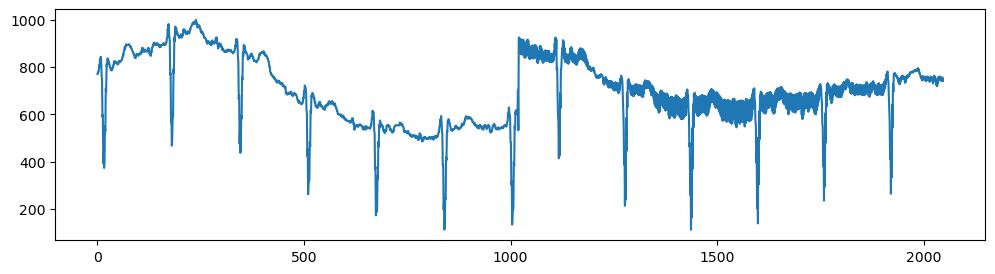

In [71]:
X = list(range(0, len(rest_y)))
for i in range(len(rest_y)):
    Y = [int(x) for x in rest_y] 
plt.figure(figsize=(12, 3))
plt.plot(X, Y)
plt.show()

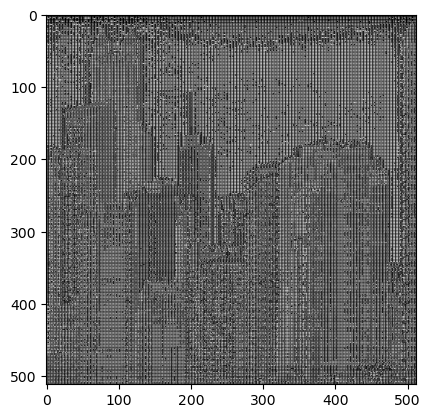

(512, 512, 3)

In [72]:
Dobeshi2_rest_img = Dobeshi2_rest_img.reshape(original_shape)
plt.imshow(Dobeshi2_rest_img)
plt.show()
img.shape

# Преобразование сигнала

In [73]:
f1 = []
f2 = []
for i in range(0,len(f)//2,2):
    f1.append(f[i])
    f2.append(f[i + 1])

In [74]:
s_res = f1 + f2 + y

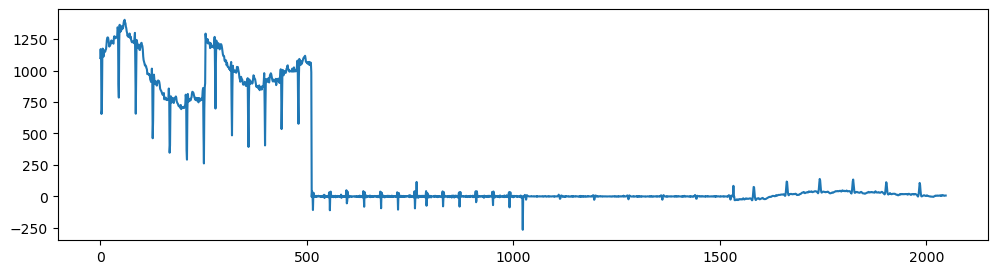

In [75]:
X = list(range(0, len(s_res)))
for i in range(len(s_res)):
    Y = [int(x) for x in s_res] 
y = Y[512:]
plt.figure(figsize=(12, 3))
plt.plot(X, Y)
plt.show()

# Преобразование изображения 

In [76]:
s1 = []
s2 = []
for i in range(0,len(Dobeshi2_img)//2,1024):
    for j in range(256):
        s1.append(Dobeshi2_img[i + j])
        s2.append(Dobeshi2_img[512 + i + j])

In [77]:
k = []
k1 = []
k2 = []
k_res = []
for i in range(0,len(s1),256):
    for j in range(0,256,2):
        k1.append(s1[i + j])
        k2.append(s1[i + j + 1])
    k = list(k1) + list(k2)
    k1 = []
    k2 = []
    k_res += k

In [78]:
s1 = []
s1 = k_res

In [79]:
k = []
k1 = []
k2 = []
k_res = []
for i in range(0,len(s2),256):
    for j in range(0,256,2):
        k1.append(s2[i + j])
        k2.append(s2[i + j + 1])
    k = list(k1) + list(k2)
    k1 = []
    k2 = []
    k_res += k

In [80]:
s2 = []
s2 = k_res

In [81]:
res = s1 + s2

In [82]:
trans_Dobeshi3_img = np.zeros((img.shape[0]*img.shape[1],3),dtype='uint8')
trans_Dobeshi3_img.shape

(262144, 3)

In [83]:
n = 0
new_res = Dobeshi2_img
for i in range(0,len(Dobeshi2_img)//2,512):
    for j in range(256):
        new_res[i + j] = res[n]
        n += 1

In [84]:
for i in range(all_pixels.shape[0]):
    trans_Dobeshi3_img[i] = new_res[i]*255

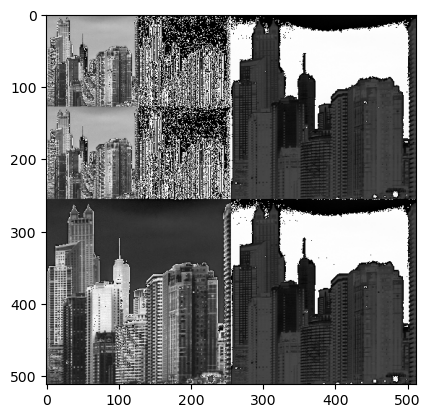

(512, 512, 3)

In [85]:
trans_Dobeshi3_img = trans_Dobeshi3_img.reshape(original_shape)
plt.imshow(trans_Dobeshi3_img)
plt.show()
img.shape

# 3 порядок Добеши 4

In [86]:
X = [int(x) for x in s_res]
f = []
for i in range(0,len(s_res),2):
    if(i < len(s_res)/2):
        a_i = c0 * X[i] + c1 * X[i + 1] + c2 * X[i + 2] + c3 * X[i + 3]
        b_i = c3 * X[i] - c2 * X[i + 1] + c1 * X[i + 2] - c0 * X[i + 3]
    else:
        a_i = c0 * X[i] + c1 * X[i + 1] + c2 * X[0] + c3 * X[1]
        b_i = c3 * X[i] - c2 * X[i + 1] + c1 * X[0] - c0 * X[1]
    f.append(a_i)
    f.append(b_i) 

In [87]:
s_rest = []
for i in range(len(s_res)//4):
    s_rest.append(s_res[i])
    s_rest.append(s_res[i+512])

In [88]:
rest_y = []
for i in range(0,len(velo2)//2,2):
    a_i = s_rest[i] + s_rest[i + 1]
    b_i = s_rest[i] - s_rest[i + 1]
    rest_y.append(a_i)
    rest_y.append(b_i)

In [89]:
s_res = rest_y + y[512:]

In [90]:
s_rest = []
for i in range(len(s_res)//2):
    s_rest.append(s_res[i])
    s_rest.append(s_res[i+1024])

In [91]:
rest_y = []
for i in range(0,len(velo2),2):
    a_i = s_rest[i] + s_rest[i + 1]
    b_i = s_rest[i] - s_rest[i + 1]
    rest_y.append(a_i)
    rest_y.append(b_i)

In [92]:
Dobeshi3_img = new_res
for i in range(0,len(Dobeshi_img)//4,512):
    for j in range(0,128,2):
        if(j < 128):
            a_i = c0 * new_res[i + j] + c1 * new_res[i + j + 1] + c2 * new_res[i + j + 2] + c3 * new_res[i + j + 3]
            b_i = c3 * new_res[i + j] - c2 * new_res[i + j + 1] + c1 * new_res[i + j + 2] - c0 * new_res[i + j + 3]
        else:
            a_i = c0 * new_res[i + j] + c1 * new_res[i + j + 1] + c2 * new_res[0] + c3 * new_res[1]
            b_i = c3 * new_res[i + j] - c2 * new_res[i + j + 1] + c1 * new_res[0] - c0 * new_res[1]
        Dobeshi3_img[i + j] = a_i
        Dobeshi3_img[i + j + 1] = b_i

In [93]:
Dobeshi3_trans_img = np.zeros((img.shape[0]*img.shape[1],3),dtype='uint8')
Dobeshi3_trans_img.shape

(262144, 3)

In [94]:
for i in range(all_pixels.shape[0]):
    Dobeshi3_trans_img[i] = Dobeshi3_img[i]*255

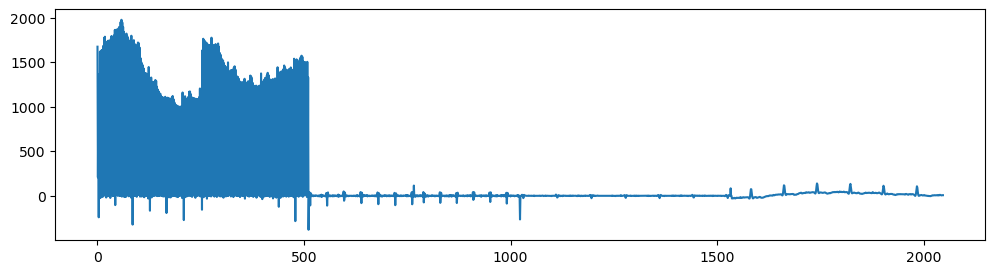

In [95]:
X = list(range(0, len(f)))
for i in range(len(f)):
    Y = [int(x) for x in f]
Y[512:] = y
plt.figure(figsize=(12, 3))
plt.plot(X, Y)
plt.show()

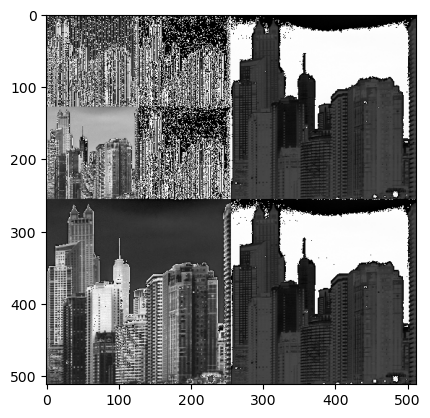

(512, 512, 3)

In [96]:
Dobeshi3_trans_img = Dobeshi3_trans_img.reshape(original_shape)
plt.imshow(Dobeshi3_trans_img)
plt.show()
img.shape

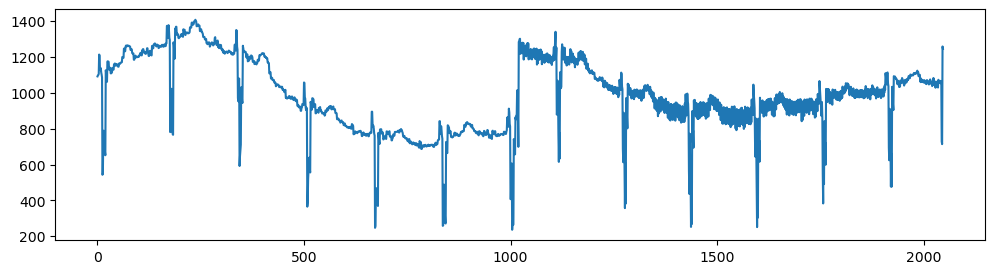

In [97]:
X = list(range(0, len(rest_y)))
for i in range(len(rest_y)):
    Y = [int(x) for x in rest_y] 
plt.figure(figsize=(12, 3))
plt.plot(X, Y)
plt.show()

# Преобразование сигнала

In [98]:
f1 = []
f2 = []
for i in range(0,len(f)//4,2):
    f1.append(f[i])
    f2.append(f[i + 1])

In [99]:
s_res = f1 + f2 + y

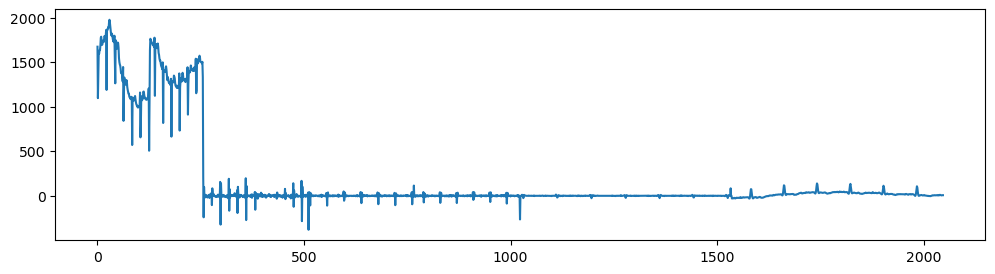

In [100]:
X = list(range(0, len(s_res)))
for i in range(len(s_res)):
    Y = [int(x) for x in s_res] 
y = Y[256:]
plt.figure(figsize=(12, 3))
plt.plot(X, Y)
plt.show()

# Преобразование изображения

In [101]:
s1 = []
s2 = []
for i in range(0,len(Dobeshi3_img),1024):
    for j in range(128):
        s1.append(Dobeshi3_img[i + j])
        s2.append(Dobeshi3_img[512 + i + j])

In [102]:
k = []
k1 = []
k2 = []
k_res = []
for i in range(0,len(s1),128):
    for j in range(0,128,2):
        k1.append(s1[i + j])
        k2.append(s1[i + j + 1])
    k = list(k1) + list(k2)
    k1 = []
    k2 = []
    k_res += k

In [103]:
s1 = []
s1 = k_res

In [104]:
k = []
k1 = []
k2 = []
k_res = []
for i in range(0,len(s2),128):
    for j in range(0,128,2):
        k1.append(s2[i + j])
        k2.append(s2[i + j + 1])
    k = list(k1) + list(k2)
    k1 = []
    k2 = []
    k_res += k

In [105]:
s2 = []
s2 = k_res

In [106]:
res = s1 + s2

In [107]:
trans_Dobeshi4_img = np.zeros((img.shape[0]*img.shape[1],3),dtype='uint8')
trans_Dobeshi4_img.shape

(262144, 3)

In [108]:
n = 0
new_res = Dobeshi3_img
for i in range(0,len(Dobeshi3_img)//4,512):
    for j in range(128):
        new_res[i + j] = res[n]
        n += 1

In [109]:
for i in range(all_pixels.shape[0]):
    trans_Dobeshi4_img[i] = new_res[i]*255

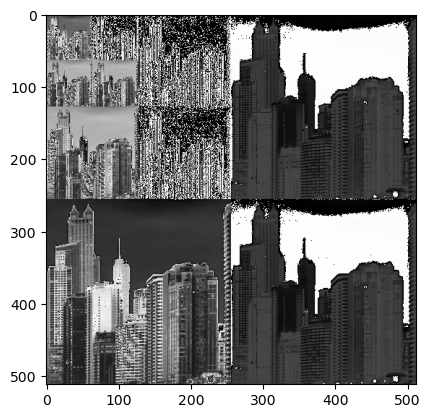

(512, 512, 3)

In [110]:
trans_Dobeshi4_img = trans_Dobeshi4_img.reshape(original_shape)
plt.imshow(trans_Dobeshi4_img)
plt.show()
img.shape

# 4 порядок Добеши 4

In [111]:
X = [int(x) for x in s_res]
f = []
for i in range(0,len(s_res),2):
    if(i < len(s_res)/2):
        a_i = c0 * X[i] + c1 * X[i + 1] + c2 * X[i + 2] + c3 * X[i + 3]
        b_i = c3 * X[i] - c2 * X[i + 1] + c1 * X[i + 2] - c0 * X[i + 3]
    else:
        a_i = c0 * X[i] + c1 * X[i + 1] + c2 * X[0] + c3 * X[1]
        b_i = c3 * X[i] - c2 * X[i + 1] + c1 * X[0] - c0 * X[1]
    f.append(a_i)
    f.append(b_i) 

In [112]:
s_rest = []
for i in range(len(s_res)//8):
    s_rest.append(s_res[i])
    s_rest.append(s_res[i+256])

In [113]:
rest_y = []
for i in range(0,len(velo2)//4,2):
    a_i = s_rest[i] + s_rest[i + 1]
    b_i = s_rest[i] - s_rest[i + 1]
    rest_y.append(a_i)
    rest_y.append(b_i)

In [114]:
s_res = rest_y + y[256:]

In [115]:
s_rest = []
for i in range(len(s_res)//4):
    s_rest.append(s_res[i])
    s_rest.append(s_res[i+512])

In [116]:
rest_y = []
for i in range(0,len(velo2)//2,2):
    a_i = s_rest[i] + s_rest[i + 1]
    b_i = s_rest[i] - s_rest[i + 1]
    rest_y.append(a_i)
    rest_y.append(b_i)

In [117]:
s_res = rest_y + y[512:]

In [118]:
s_rest = []
for i in range(len(s_res)//2):
    s_rest.append(s_res[i])
    s_rest.append(s_res[i+1024])

In [119]:
rest_y = []
for i in range(0,len(velo2),2):
    a_i = s_rest[i] + s_rest[i + 1]
    b_i = s_rest[i] - s_rest[i + 1]
    rest_y.append(a_i)
    rest_y.append(b_i)

In [120]:
Dobeshi4_img = new_res
for i in range(0,len(Dobeshi_img)//8,512):
    for j in range(0,64,2):
        if(j < 64):
            a_i = c0 * new_res[i + j] + c1 * new_res[i + j + 1] + c2 * new_res[i + j + 2] + c3 * new_res[i + j + 3]
            b_i = c3 * new_res[i + j] - c2 * new_res[i + j + 1] + c1 * new_res[i + j + 2] - c0 * new_res[i + j + 3]
        else:
            a_i = c0 * new_res[i + j] + c1 * new_res[i + j + 1] + c2 * new_res[0] + c3 * new_res[1]
            b_i = c3 * new_res[i + j] - c2 * new_res[i + j + 1] + c1 * new_res[0] - c0 * new_res[1]
        Dobeshi4_img[i + j] = a_i
        Dobeshi4_img[i + j + 1] = b_i

In [121]:
Dobeshi4_trans_img = np.zeros((img.shape[0]*img.shape[1],3),dtype='uint8')
Dobeshi4_trans_img.shape

(262144, 3)

In [122]:
for i in range(all_pixels.shape[0]):
    Dobeshi4_trans_img[i] = Dobeshi4_img[i]*255

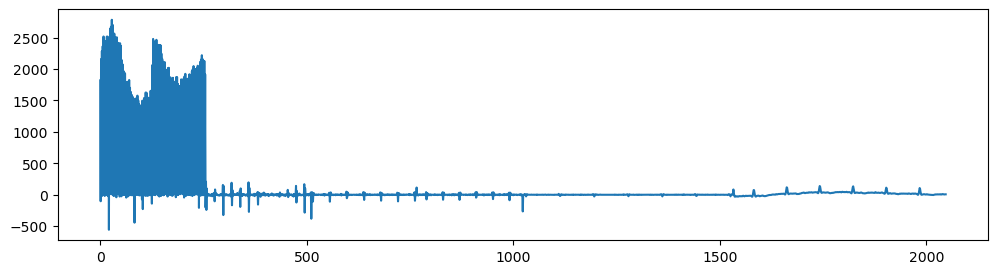

In [123]:
X = list(range(0, len(f)))
for i in range(len(f)):
    Y = [int(x) for x in f]
Y[256:] = y
plt.figure(figsize=(12, 3))
plt.plot(X, Y)
plt.show()

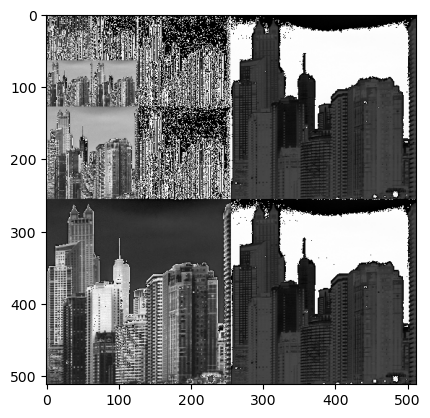

(512, 512, 3)

In [124]:
Dobeshi4_trans_img = Dobeshi4_trans_img.reshape(original_shape)
plt.imshow(Dobeshi4_trans_img)
plt.show()
img.shape

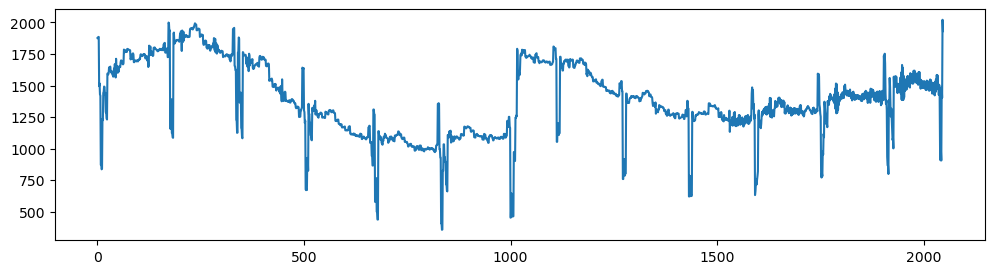

In [125]:
X = list(range(0, len(rest_y)))
for i in range(len(rest_y)):
    Y = [int(x) for x in rest_y] 
plt.figure(figsize=(12, 3))
plt.plot(X, Y)
plt.show()